In [1]:
import pandas as pd
import numpy as np
import re 

import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
data = pd.read_csv('main_code/extracted_data/ropa_data2.csv')

In [7]:
data.drop(columns=['Link', 'Image'], inplace=True)

In [8]:
data.sort_values('Price', ascending=False)

,Product,Price,Review,Comments,Category,Size Pe. [%],Size Corr. [%],Size Gran. [%],XS,S,M,L,XL
263,Blusa unicolor pecho con fruncido de cuello sc...,US$9.00,4.9,Todos los comentarios (103),Blusas de Mujer,Pequeña 2%,La talla corresponde 94%,Grande 4%,0,sTodos los comentarios (47),mTodos los comentarios (24),lTodos los comentarios (22),xlTodos los comentarios (13)
141,Camiseta unicolor de cuello cuadrado,US$9.00,4.8,Todos los comentarios (485),Camisetas de Mujer,Pequeña 5%,La talla corresponde 91%,Grande 4%,xsTodos los comentarios (75),sTodos los comentarios (150),mTodos los comentarios (151),lTodos los comentarios (116),0
647,SHEIN Falda ajustada cruzada fruncido con dise...,US$9.00,4.9,Todos los comentarios (9999+),Faldas de Mujer,Pequeña 2%,La talla corresponde 94%,Grande 4%,xsTodos los comentarios (1638),sTodos los comentarios (2821),mTodos los comentarios (3282),lTodos los comentarios (2225),0
388,Camiseta unicolor escote V tejida waffle,US$9.00,5.0,Todos los comentarios (9999+),Camisetas de Mujer,Pequeña 2%,La talla corresponde 95%,Grande 3%,xsTodos los comentarios (1265),sTodos los comentarios (2802),mTodos los comentarios (3316),lTodos los comentarios (2573),0
641,Camiseta delgada tejida de canalé de cuello to...,US$9.00,4.8,Todos los comentarios (4078),Camisetas de Mujer,Pequeña 4%,La talla corresponde 95%,Grande 1%,xsTodos los comentarios (252),sTodos los comentarios (1452),mTodos los comentarios (1375),lTodos los comentarios (967),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Top tubo corto unicolor bustier,US$10.00,4.3,Todos los comentarios (58),Tops de mujeres,Pequeña 11%,La talla corresponde 81%,Grande 8%,xsTodos los comentarios (26),sTodos los comentarios (22),mTodos los comentarios (8),lTodos los comentarios (7),0
579,SHEIN Vestido Cremallera Liso Elegante,US$10.00,4.9,Todos los comentarios (8746),Vestidos de Mujer,Pequeña 4%,La talla corresponde 95%,Grande 1%,xsTodos los comentarios (3209),sTodos los comentarios (2978),mTodos los comentarios (1630),lTodos los comentarios (544),xlTodos los comentarios (239)
153,SHEIN Leggings de cintura ancha unicolor,US$10.00,5.0,Todos los comentarios (9999+),Leggings para Mujer,Pequeña 2%,La talla corresponde 96%,Grande 2%,xsTodos los comentarios (1745),sTodos los comentarios (1745),mTodos los comentarios (2675),lTodos los comentarios (2016),xlTodos los comentarios (1224)
65,Blusas Leopardo Bohemio,US$10.00,4.8,Todos los comentarios (1779),Blusas de Mujer,Pequeña 12%,La talla corresponde 88%,Grande 0%,xsTodos los comentarios (164),sTodos los comentarios (413),mTodos los comentarios (585),lTodos los comentarios (619),0


In [9]:
data[['Price']].plot.box()

TypeError: no numeric data to plot

In [10]:
data[['Comments']].describe()

,Comments
count,713
unique,459
top,Todos los comentarios (9999+)
freq,210


In [18]:
max_comments = data[data['Comments'] > 9000]

In [20]:
max_comments.sort_values('Comments')

,Product,Price,Review,Comments,Categoría,Talla Pe. [%],Talla Corr. [%],Talla Gran. [%]
501,Vestidos Volante Lunares Azul Cadete Dulce,15.0,4.8,9042,Vestidos de Mujer,3,86,11
489,Blusas Volante fruncido todo estampado Elegante,13.0,4.9,9068,Blusas de Mujer,5,94,1
393,Camiseta corta con botón,9.0,4.8,9348,Camisetas de Mujer,9,91,0
464,Pareos Abertura alta Liso,13.0,4.8,9483,Pareos para Mujer,1,95,4
270,Vestido de tirantes de cable con botón delantero,15.0,4.8,9537,Vestidos de Mujer,5,91,4
...,...,...,...,...,...,...,...,...
172,SHEIN Leggings de cintura ancha unicolor,10.0,5.0,9999,Leggings para Mujer,2,96,2
173,Pantalones Botón Liso Elegante,20.0,5.0,9999,Pantalones de Mujer,2,93,5
176,SHEIN BASICS Falda mini ajustada unicolor,6.0,5.0,9999,Faldas de Mujer,2,97,1
157,Pantalones a medida de cintura alta unicolor,15.0,5.0,9999,pantalones de traje de mujer,3,91,6


count    524.000000
mean      12.257634
std        5.729101
min        3.000000
25%        8.000000
50%       11.000000
75%       15.000000
max       35.000000
Name: Price, dtype: float64

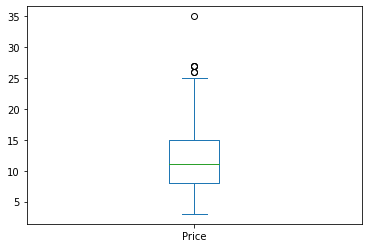

In [33]:
data.Price.plot.box()
data.Price.describe()

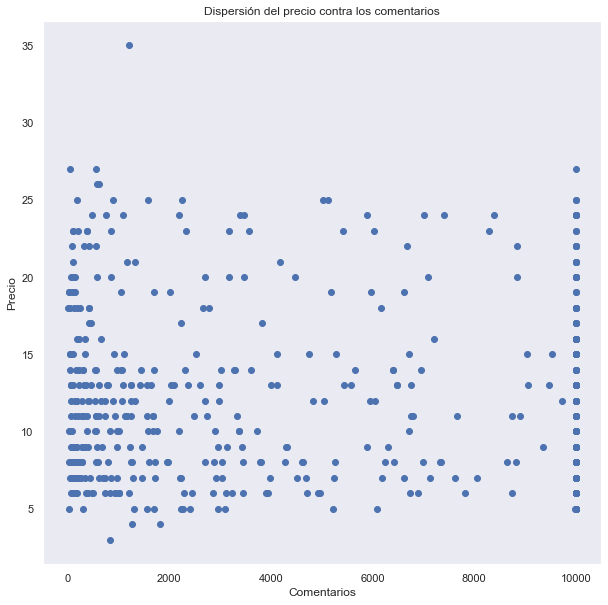

In [61]:
plt.figure(figsize=(10,10))
plt.title('Dispersión del precio contra los comentarios')
plt.xlabel('Comentarios')
plt.ylabel('Precio')

x = data.Comments
y = data.Price

plt.scatter(x,y)
plt.show()

In [74]:
comment_catego = data.groupby('Categoría', as_index=False).agg({'Comments':['mean','count'], 'Price':'mean'})
comment_catego

Categoría     Comments            Price
                                                     mean count       mean
0                           Abrigos de Mujer  9176.800000     5  24.600000
1                         Bañadores de Mujer  8674.714286     7   9.285714
2                           Blazers de Mujer  1573.000000     1  25.000000
3                            Blusas de Mujer  4400.128571    70  12.457143
4                         Camisetas de Mujer  4030.071429   112   9.526786
5      Camisetas y Tops de Tirantes de Mujer  4336.224490    98   7.673469
6                       Cazadoras para Mujer  2725.000000     4  21.750000
7                         Cárdigans de Mujer  5499.166667     6  18.333333
8                            Faldas de Mujer  6886.208333    24  10.958333
9                           Jerseys de Mujer  3434.882353    17  18.352941
10                       Leggings para Mujer  9184.000000     7   7.571429
11                            Monos de Mujer   342.500000     2  13.500000
12      Monos y Overoles Vaqueros para Mujer   569.000000     1  26.000000
13                Pantalones Cortos de Mujer  4950.714286     7  10.428571
14  Pantalones Cortos de Vaqueros para Mujer  1244.000000     1  13.000000
15            Pantalones Vaqueros para Mujer  5147.485714    35  23.085714
16          Pantalones de Deporte para Mujer  4566.600000     5  19.000000
17                       Pantalones de Mujer  7932.322581    31  15.354839
18                         Pareos para Mujer  9827.000000     3  11.000000
19                 Sets de Bikini para Mujer  6491.000000     1  13.000000
20                        Sudaderas de Mujer  4657.115385    26  13.000000
21                  Tops de Punto para Mujer  1153.000000     5  15.400000
22                           Tops de mujeres  3843.611111    18   7.500000
23           Trajes de Dos Piezas para Mujer  1871.571429     7  16.857143
24             Vestidos de Jersey para Mujer  4481.000000     1  20.000000
25                         Vestidos de Mujer  4167.000000    29  14.724138
26              pantalones de traje de mujer  9999.000000     1  15.000000

C:\Users\bkeny\AppData\Local\Temp/ipykernel_23352/3988220716.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


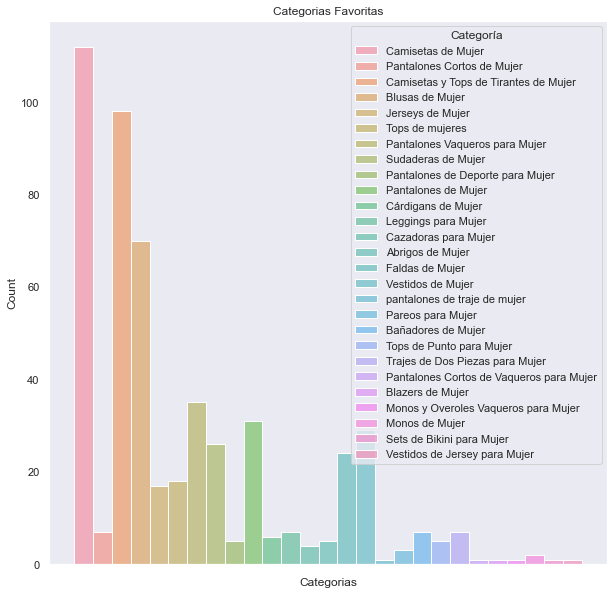

In [52]:
sns.set(context='notebook', style='dark', rc={'figure.figsize': (10, 10)})

ax = sns.histplot(data=data, x='Categoría', hue='Categoría')

ax.set_title('Categorias Favoritas')
ax.set(xlabel='Categorias')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

C:\Users\bkeny\AppData\Local\Temp/ipykernel_23352/2067108526.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


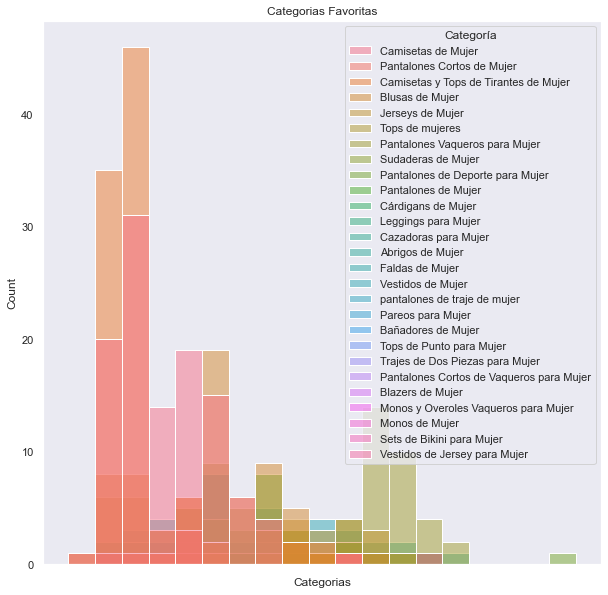

In [60]:
sns.set(context='notebook', style='dark', rc={'figure.figsize': (10, 10)})

ax = sns.histplot(data=data, x='Price', hue='Categoría')

ax.set_title('Categorias Favoritas')
ax.set(xlabel='Categorias')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

<AxesSubplot:>

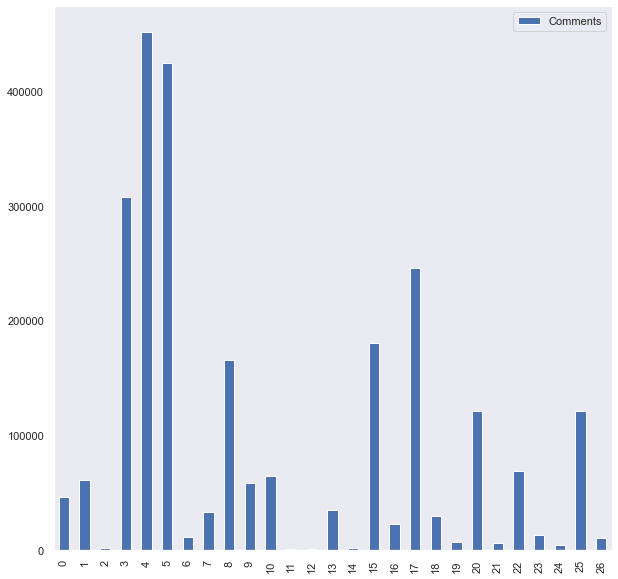

In [45]:
comment_catego.plot.bar()

In [54]:
max_comments.sort_values('Price', ascending=True
                        )

,Product,Price,Review,Comments,Categoría,Talla Pe. [%],Talla Corr. [%],Talla Gran. [%]
267,Top halter corto tejido de canalé,5.0,5.0,9999,Camisetas y Tops de Tirantes de Mujer,2,94,4
118,SHEIN Top de tirante corto sólido,5.0,5.0,9999,Camisetas y Tops de Tirantes de Mujer,5,95,0
131,SHEIN Top sin mangas liso con cuello redondo g...,5.0,5.0,9999,Camisetas y Tops de Tirantes de Mujer,2,95,3
61,SHEIN Top corto tejido de canalé de un hombro,5.0,5.0,9999,Tops de mujeres,2,95,3
370,SHEIN Top corto de hombro asimétrico,5.0,5.0,9999,Tops de mujeres,2,96,2
...,...,...,...,...,...,...,...,...
446,SHEIN Jersey corto de hombros caídos de cuello...,24.0,5.0,9999,Jerseys de Mujer,2,96,2
291,Vaqueros cargo con bolsillo de cintura alta,24.0,5.0,9999,Pantalones Vaqueros para Mujer,4,93,3
262,Vaqueros holgados rotos de cintura alta,25.0,5.0,9999,Pantalones Vaqueros para Mujer,3,90,7
245,Chaqueta bajo irregular con bolsillo con solapa,25.0,5.0,9999,Abrigos de Mujer,1,91,8


C:\Users\bkeny\AppData\Local\Temp/ipykernel_23352/1338692290.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


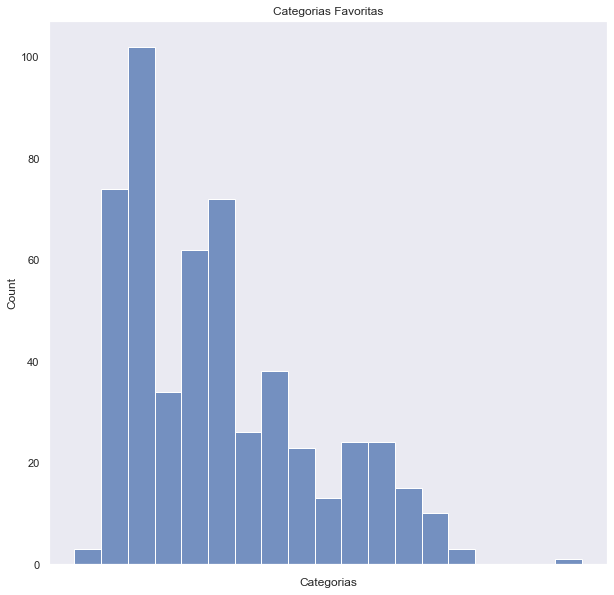

In [69]:
sns.set(context='notebook', style='dark', rc={'figure.figsize': (10, 10)})

ax = sns.histplot(data=data, x='Price')

ax.set_title('Categorias Favoritas')
ax.set(xlabel='Categorias')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

array([[<AxesSubplot:title={'center':'Comments'}>,
        <AxesSubplot:title={'center':'Price'}>]], dtype=object)

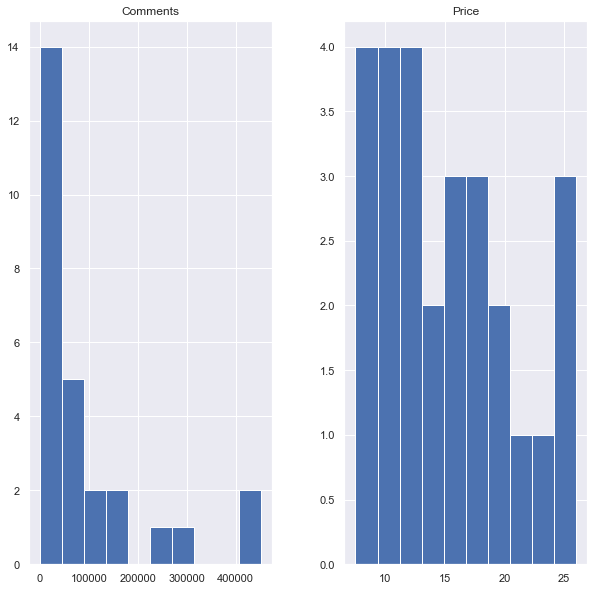

In [70]:
comment_catego.sort_values('Price', ascending=True).hist()

In [77]:
comment_catego.sort_values(( 'Comments',  'mean'))

Categoría     Comments            Price
                                                     mean count       mean
11                            Monos de Mujer   342.500000     2  13.500000
12      Monos y Overoles Vaqueros para Mujer   569.000000     1  26.000000
21                  Tops de Punto para Mujer  1153.000000     5  15.400000
14  Pantalones Cortos de Vaqueros para Mujer  1244.000000     1  13.000000
2                           Blazers de Mujer  1573.000000     1  25.000000
23           Trajes de Dos Piezas para Mujer  1871.571429     7  16.857143
6                       Cazadoras para Mujer  2725.000000     4  21.750000
9                           Jerseys de Mujer  3434.882353    17  18.352941
22                           Tops de mujeres  3843.611111    18   7.500000
4                         Camisetas de Mujer  4030.071429   112   9.526786
25                         Vestidos de Mujer  4167.000000    29  14.724138
5      Camisetas y Tops de Tirantes de Mujer  4336.224490    98   7.673469
3                            Blusas de Mujer  4400.128571    70  12.457143
24             Vestidos de Jersey para Mujer  4481.000000     1  20.000000
16          Pantalones de Deporte para Mujer  4566.600000     5  19.000000
20                        Sudaderas de Mujer  4657.115385    26  13.000000
13                Pantalones Cortos de Mujer  4950.714286     7  10.428571
15            Pantalones Vaqueros para Mujer  5147.485714    35  23.085714
7                         Cárdigans de Mujer  5499.166667     6  18.333333
19                 Sets de Bikini para Mujer  6491.000000     1  13.000000
8                            Faldas de Mujer  6886.208333    24  10.958333
17                       Pantalones de Mujer  7932.322581    31  15.354839
1                         Bañadores de Mujer  8674.714286     7   9.285714
0                           Abrigos de Mujer  9176.800000     5  24.600000
10                       Leggings para Mujer  9184.000000     7   7.571429
18                         Pareos para Mujer  9827.000000     3  11.000000
26              pantalones de traje de mujer  9999.000000     1  15.000000

In [11]:
comment_catego.columns

NameError: name 'comment_catego' is not defined

In [13]:
df_2 = pd.read_csv('main_code/extracted_data/ropa_data2.csv')
df_2

,Product,Price,Review,Comments,Category,Image,Size Pe. [%],Size Corr. [%],Size Gran. [%],XS,S,M,L,XL,Link
0,Camiseta de hombros caídos con estampado de es...,US$6.00,4.9,Todos los comentarios (1469),Camisetas de Mujer,//img.ltwebstatic.com/images3_pi/2021/03/01/16...,Pequeña 3%,La talla corresponde 93%,Grande 4%,0,sTodos los comentarios (365),mTodos los comentarios (471),lTodos los comentarios (343),xlTodos los comentarios (279),https://us.shein.com//Skeleton-Print-Drop-Shou...
1,Camiseta de manga corta con estampado de seta ...,US$6.00,4.9,Todos los comentarios (788),Camisetas de Mujer,//img.ltwebstatic.com/images3_pi/2021/08/10/16...,Pequeña 3%,La talla corresponde 94%,Grande 3%,xsTodos los comentarios (64),sTodos los comentarios (174),mTodos los comentarios (215),lTodos los comentarios (213),xlTodos los comentarios (122),https://us.shein.com//Mushroom-And-Butterfly-P...
2,SHEIN Shorts con parche de cintura con cordón,US$10.00,4.9,Todos los comentarios (3998),Pantalones Cortos de Mujer,//img.ltwebstatic.com/images3_pi/2021/06/07/16...,Pequeña 2%,La talla corresponde 95%,Grande 3%,xsTodos los comentarios (599),sTodos los comentarios (1169),mTodos los comentarios (1183),lTodos los comentarios (705),xlTodos los comentarios (326),https://us.shein.com//SHEIN-Drawstring-Waist-P...
3,Top corto con estampado de mármol con cordón d...,US$11.00,4.8,Todos los comentarios (2009),Camisetas de Mujer,//img.ltwebstatic.com/images3_pi/2021/06/28/16...,Pequeña 8%,La talla corresponde 91%,Grande 1%,xsTodos los comentarios (520),sTodos los comentarios (796),mTodos los comentarios (470),lTodos los comentarios (205),0,https://us.shein.com//Marble-Print-Tie-Front-C...
4,Top de tirantes corto con encaje,US$8.00,4.7,Todos los comentarios (5381),Camisetas y Tops de Tirantes de Mujer,//img.ltwebstatic.com/images3_pi/2021/05/20/16...,Pequeña 13%,La talla corresponde 87%,Grande 0%,0,sTodos los comentarios (2838),mTodos los comentarios (1542),lTodos los comentarios (980),0,https://us.shein.com//Lace-Crop-Cami-Top-p-244...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,Vaqueros de pierna recta de cintura alta,US$24.00,4.6,Todos los comentarios (1320),Pantalones Vaqueros para Mujer,//img.ltwebstatic.com/images3_pi/2021/07/13/16...,Pequeña 5%,La talla corresponde 77%,Grande 18%,xsTodos los comentarios (444),sTodos los comentarios (367),mTodos los comentarios (337),lTodos los comentarios (163),0,https://us.shein.com//High-Waist-Straight-Leg-...
709,SHEIN Camiseta ribete en forma de lechuga de m...,US$6.00,5.0,Todos los comentarios (9999+),Camisetas de Mujer,//img.ltwebstatic.com/images3_pi/2020/10/13/16...,Pequeña 3%,La talla corresponde 97%,Grande 0%,xsTodos los comentarios (9999+),sTodos los comentarios (3317),mTodos los comentarios (2518),lTodos los comentarios (1240),xlTodos los comentarios (800),https://us.shein.com//SHEIN-Flounce-Sleeve-Let...
710,SHEIN Falda mini de pana bajo con abertura,US$8.00,5.0,Todos los comentarios (9999+),Faldas de Mujer,//img.ltwebstatic.com/images3_pi/2020/07/02/15...,Pequeña 3%,La talla corresponde 91%,Grande 6%,xsTodos los comentarios (2659),sTodos los comentarios (2481),mTodos los comentarios (2442),lTodos los comentarios (1388),xlTodos los comentarios (918),https://us.shein.com//SHEIN-Split-Hem-Corduroy...
711,SHEIN Pantalones cónicos de lunares de cintura...,US$12.00,4.8,Todos los comentarios (8492),Pantalones de Mujer,//img.ltwebstatic.com/images3_pi/2020/01/13/15...,Pequeña 3%,La talla corresponde 93%,Grande 4%,xsTodos los comentarios (1137),sTodos los comentarios (1931),mTodos los comentarios (2853),lTodos los comentarios (2528),0,https://us.shein.com//SHEIN-High-Waist-Polka-d...


In [14]:
def get_price(string):
    price = re.findall(r'\d..*', str(string))
    return float(price[0])

def get_num(string):
    num = re.findall(r'[0-9]+', str(string))
    return int(num[0])


def cleaning_data(df):
    
    df['Price'] = df['Price'].apply(get_price)
    df['Comments'] = df['Comments'].apply(get_num)
    df['Size Pe. [%]'] = df['Size Pe. [%]'].apply(get_num)
    df['Size Corr. [%]'] = df['Size Corr. [%]'].apply(get_num)
    df['Size Gran. [%]'] = df['Size Gran. [%]'].apply(get_num)
    df['XS'] = df['XS'].apply(get_num)
    df['S'] = df['S'].apply(get_num)
    df['M'] = df['M'].apply(get_num)
    df['L'] = df['L'].apply(get_num)
    df['XL'] = df['XL'].apply(get_num)
    df['Image'] = df['Image'].apply(lambda x: 'https:' + x)
    #df.to_csv('extracted_data/ropa_datav', index=False)
    return df 

In [15]:
df_2 = cleaning_data(df_2)

df_2.drop(columns=['Image','Link'], inplace=True)

In [16]:

df_2

,Product,Price,Review,Comments,Category,Size Pe. [%],Size Corr. [%],Size Gran. [%],XS,S,M,L,XL
0,Camiseta de hombros caídos con estampado de es...,6.0,4.9,1469,Camisetas de Mujer,3,93,4,0,365,471,343,279
1,Camiseta de manga corta con estampado de seta ...,6.0,4.9,788,Camisetas de Mujer,3,94,3,64,174,215,213,122
2,SHEIN Shorts con parche de cintura con cordón,10.0,4.9,3998,Pantalones Cortos de Mujer,2,95,3,599,1169,1183,705,326
3,Top corto con estampado de mármol con cordón d...,11.0,4.8,2009,Camisetas de Mujer,8,91,1,520,796,470,205,0
4,Top de tirantes corto con encaje,8.0,4.7,5381,Camisetas y Tops de Tirantes de Mujer,13,87,0,0,2838,1542,980,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,Vaqueros de pierna recta de cintura alta,24.0,4.6,1320,Pantalones Vaqueros para Mujer,5,77,18,444,367,337,163,0
709,SHEIN Camiseta ribete en forma de lechuga de m...,6.0,5.0,9999,Camisetas de Mujer,3,97,0,9999,3317,2518,1240,800
710,SHEIN Falda mini de pana bajo con abertura,8.0,5.0,9999,Faldas de Mujer,3,91,6,2659,2481,2442,1388,918
711,SHEIN Pantalones cónicos de lunares de cintura...,12.0,4.8,8492,Pantalones de Mujer,3,93,4,1137,1931,2853,2528,0


In [17]:
df_2['total_size'] = df_2['XS'] +df_2['S'] +df_2['M'] +df_2['L'] +df_2['XL'] 
df_2

,Product,Price,Review,Comments,Category,Size Pe. [%],Size Corr. [%],Size Gran. [%],XS,S,M,L,XL,total_size
0,Camiseta de hombros caídos con estampado de es...,6.0,4.9,1469,Camisetas de Mujer,3,93,4,0,365,471,343,279,1458
1,Camiseta de manga corta con estampado de seta ...,6.0,4.9,788,Camisetas de Mujer,3,94,3,64,174,215,213,122,788
2,SHEIN Shorts con parche de cintura con cordón,10.0,4.9,3998,Pantalones Cortos de Mujer,2,95,3,599,1169,1183,705,326,3982
3,Top corto con estampado de mármol con cordón d...,11.0,4.8,2009,Camisetas de Mujer,8,91,1,520,796,470,205,0,1991
4,Top de tirantes corto con encaje,8.0,4.7,5381,Camisetas y Tops de Tirantes de Mujer,13,87,0,0,2838,1542,980,0,5360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,Vaqueros de pierna recta de cintura alta,24.0,4.6,1320,Pantalones Vaqueros para Mujer,5,77,18,444,367,337,163,0,1311
709,SHEIN Camiseta ribete en forma de lechuga de m...,6.0,5.0,9999,Camisetas de Mujer,3,97,0,9999,3317,2518,1240,800,17874
710,SHEIN Falda mini de pana bajo con abertura,8.0,5.0,9999,Faldas de Mujer,3,91,6,2659,2481,2442,1388,918,9888
711,SHEIN Pantalones cónicos de lunares de cintura...,12.0,4.8,8492,Pantalones de Mujer,3,93,4,1137,1931,2853,2528,0,8449


In [18]:
df_2.columns

Index(['Product', 'Price', 'Review', 'Comments', 'Category', 'Size Pe. [%]',
       'Size Corr. [%]', 'Size Gran. [%]', 'XS', 'S', 'M', 'L', 'XL',
       'total_size'],
      dtype='object')

In [19]:
list_col = ['XS', 'S', 'M', 'L', 'XL']

for col in list_col:
    index = col+'[%]'
    
    df_2[index] = df_2[col] / df_2['total_size'] * 100

In [20]:
df_2

,Product,Price,Review,Comments,Category,Size Pe. [%],Size Corr. [%],Size Gran. [%],XS,S,M,L,XL,total_size,XS[%],S[%],M[%],L[%],XL[%]
0,Camiseta de hombros caídos con estampado de es...,6.0,4.9,1469,Camisetas de Mujer,3,93,4,0,365,471,343,279,1458,0.000000,25.034294,32.304527,23.525377,19.135802
1,Camiseta de manga corta con estampado de seta ...,6.0,4.9,788,Camisetas de Mujer,3,94,3,64,174,215,213,122,788,8.121827,22.081218,27.284264,27.030457,15.482234
2,SHEIN Shorts con parche de cintura con cordón,10.0,4.9,3998,Pantalones Cortos de Mujer,2,95,3,599,1169,1183,705,326,3982,15.042692,29.357107,29.708689,17.704671,8.186841
3,Top corto con estampado de mármol con cordón d...,11.0,4.8,2009,Camisetas de Mujer,8,91,1,520,796,470,205,0,1991,26.117529,39.979910,23.606228,10.296334,0.000000
4,Top de tirantes corto con encaje,8.0,4.7,5381,Camisetas y Tops de Tirantes de Mujer,13,87,0,0,2838,1542,980,0,5360,0.000000,52.947761,28.768657,18.283582,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,Vaqueros de pierna recta de cintura alta,24.0,4.6,1320,Pantalones Vaqueros para Mujer,5,77,18,444,367,337,163,0,1311,33.867277,27.993898,25.705568,12.433257,0.000000
709,SHEIN Camiseta ribete en forma de lechuga de m...,6.0,5.0,9999,Camisetas de Mujer,3,97,0,9999,3317,2518,1240,800,17874,55.941591,18.557682,14.087501,6.937451,4.475775
710,SHEIN Falda mini de pana bajo con abertura,8.0,5.0,9999,Faldas de Mujer,3,91,6,2659,2481,2442,1388,918,9888,26.891181,25.091019,24.696602,14.037217,9.283981
711,SHEIN Pantalones cónicos de lunares de cintura...,12.0,4.8,8492,Pantalones de Mujer,3,93,4,1137,1931,2853,2528,0,8449,13.457214,22.854776,33.767310,29.920701,0.000000


In [21]:
size = df_2.groupby('Category', as_index=False).agg({'Product': 'count', 'XS[%]': 'mean' ,'S[%]': 'mean', 'M[%]': 'mean', 'L[%]': 'mean', 'XL[%]': 'mean' })

In [60]:
size_top5 = size.sort_values('Product', ascending=False).nlargest(3, 'Product')
size_top5.to_excel('top_3_size.xlsx')

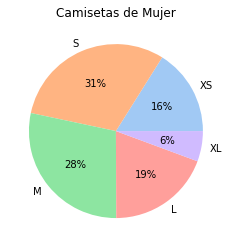

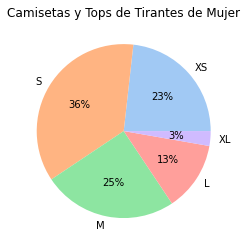

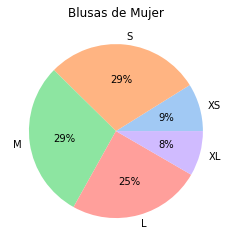

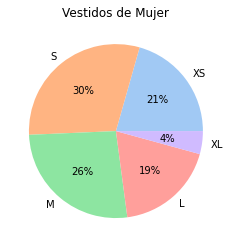

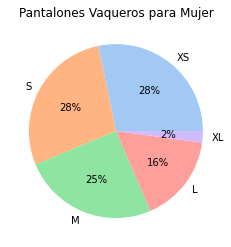

In [23]:
for i in range(0, len(size_top5)):

    data = size_top5.iloc[i , -5:].values
    labels = ['XS', 'S', 'M', 'L', 'XL']

    #define Seaborn color palette to use
    colors = sns.color_palette('pastel')[0:5]

    #create pie chart
    plt.title(size_top5.iloc[i, 0])
    plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
    plt.show()

In [24]:
size_top5.columns

Index(['Category', 'Product', 'XS[%]', 'S[%]', 'M[%]', 'L[%]', 'XL[%]'], dtype='object')

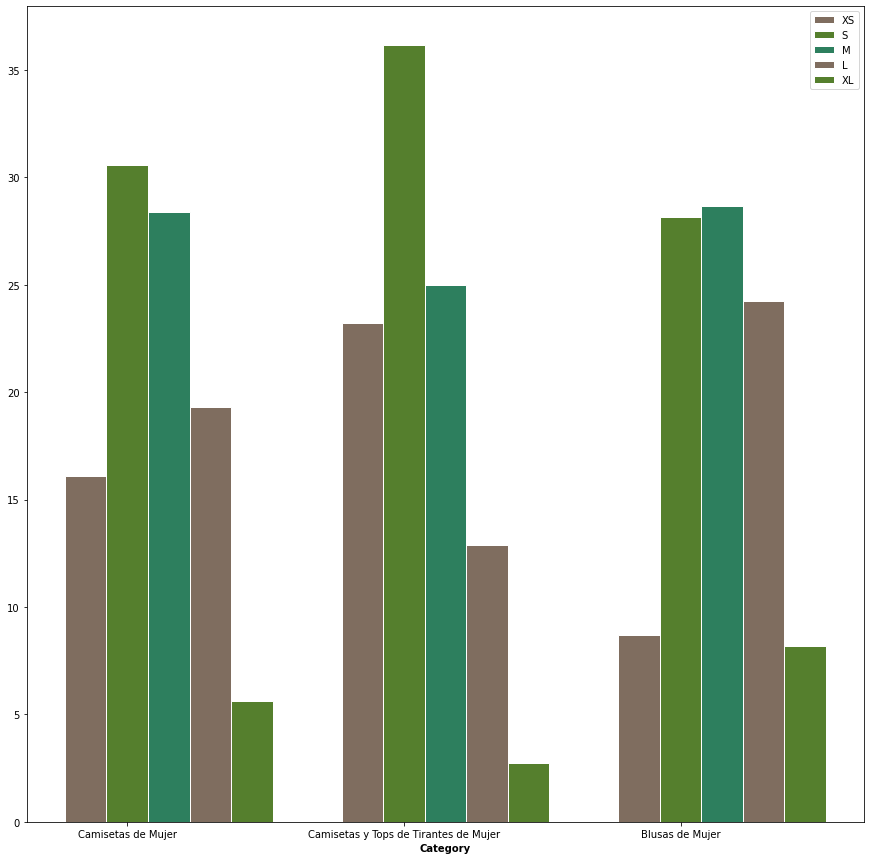

In [62]:
# set width of bars
barWidth = 0.15
 
# set heights of bars
xs = size_top5.iloc[:, 2].values
s  = size_top5.iloc[:, 3].values
m  = size_top5.iloc[:, 4].values
l  = size_top5.iloc[:, 5].values
xl = size_top5.iloc[:, 6].values



# Set position of bar on X axis
r1 = np.arange(len(xs))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]


# Make the plot
plt.figure(figsize=(15,15))
plt.bar(r1, xs, color='#7f6d5f', width=barWidth, edgecolor='white', label='XS')
plt.bar(r2, s, color='#557f2d', width=barWidth, edgecolor='white', label='S')
plt.bar(r3, m, color='#2d7f5e', width=barWidth, edgecolor='white', label='M')
plt.bar(r4, l, color='#7f6d5f', width=barWidth, edgecolor='white', label='L')
plt.bar(r5, xl, color='#557f2d', width=barWidth, edgecolor='white', label='XL')

# Add xticks on the middle of the group bars
plt.xlabel('Category', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(xs))], size_top5.iloc[:,0].values)
 
# Create legend & Show graphic
plt.legend()
plt.show()

In [25]:
size_top5.iloc[:,0].values

array(['Camisetas de Mujer', 'Camisetas y Tops de Tirantes de Mujer',
       'Blusas de Mujer', 'Vestidos de Mujer',
       'Pantalones Vaqueros para Mujer'], dtype=object)

In [26]:
df_2['XS[%]'].mean()

17.188333208297383

In [27]:
df_2.iloc[: , -5:].mean().values

array([17.18833321, 32.156692  , 27.56944083, 18.44387626,  4.64165769])

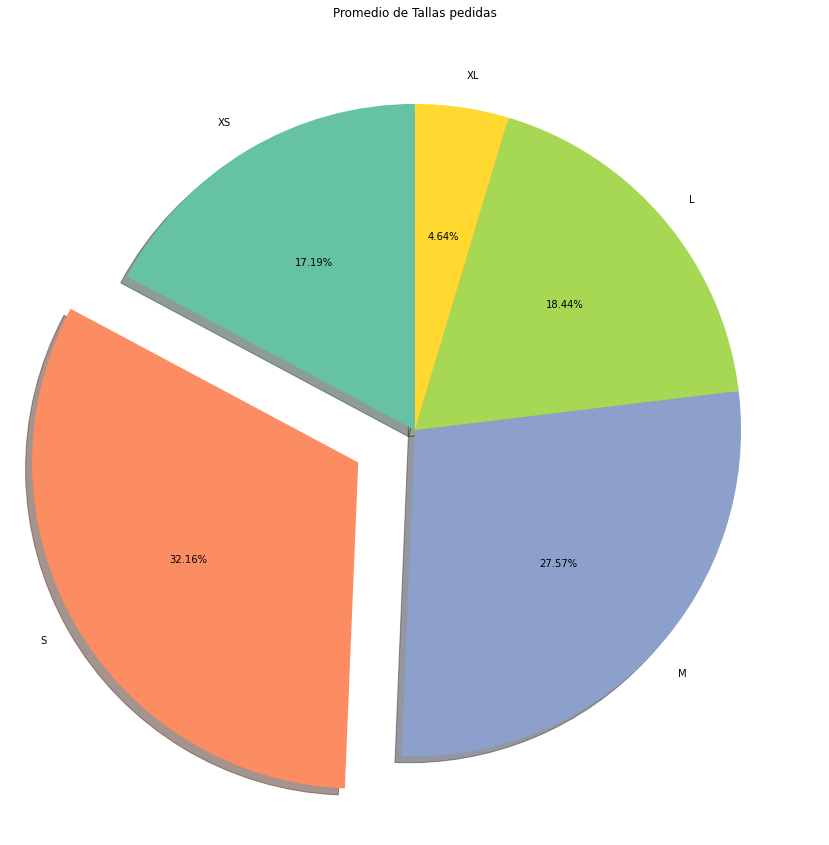

In [117]:
data = df_2.iloc[: , -5:].mean().values
labels = ['XS', 'S', 'M', 'L', 'XL']

#define Seaborn color palette to use

colors = sns.color_palette('Set2')[0:3] + sns.color_palette('Set2')[4:7]
#create pie chart
plt.figure(figsize=(15,15))
explode = (0, 0.2, 0, 0, 0)
plt.title('Promedio de Tallas pedidas')
plt.pie(data, labels = labels, autopct='%1.2f%%', colors=colors, startangle=90,
        explode=explode, shadow=True)
plt.l
plt.show()

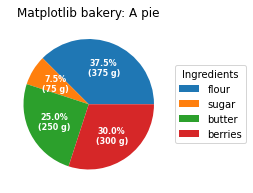

In [119]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

recipe = ["375 g flour",
          "75 g sugar",
          "250 g butter",
          "300 g berries"]

data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Matplotlib bakery: A pie")

plt.show()

In [53]:
size = df_2.groupby('Category', as_index=False).agg({'Product': 'count',
                                                     'XS[%]': 'mean' ,'S[%]': 'mean',
                                                     'M[%]': 'mean', 'L[%]': 'mean', 
                                                     'XL[%]': 'mean', 'Price':'mean', 'Comments':'mean', 'Review':'mean' })

In [54]:
size.nlargest(10, 'Comments')#.to_excel('top_5.xlsx')

,Category,Product,XS[%],S[%],M[%],L[%],XL[%],Price,Comments,Review
25,pantalones de traje de mujer,1,34.895833,26.929012,19.087577,19.087577,0.000000,15.000000,9999.000000,5.000000
11,Leggings para Mujer,10,16.330672,31.414770,27.706538,18.652408,5.895612,7.500000,9871.800000,4.970000
0,Abrigos de Invierno para Mujer,1,0.000000,57.075627,30.962023,8.689942,3.272409,29.000000,9198.000000,4.900000
1,Abrigos de Mujer,8,20.107704,33.834454,28.025589,14.558738,3.473515,24.000000,8079.500000,4.912500
16,Pantalones de Mujer,39,19.039221,29.493888,25.538234,17.066148,6.298407,16.025641,7365.846154,4.897436
2,Bañadores de Mujer,9,14.741805,28.801764,30.318074,21.908460,4.229897,9.888889,6857.777778,4.944444
9,Faldas de Mujer,39,19.429972,33.345966,27.002049,16.223285,3.998727,10.820513,6819.769231,4.871795
12,Pantalones Cortos de Mujer,8,22.829408,29.911225,27.118268,15.469463,4.671635,10.000000,5905.375000,4.912500
15,Pantalones de Deporte para Mujer,10,21.190061,28.301204,26.124782,17.861227,6.522725,21.900000,5576.800000,4.920000
14,Pantalones Vaqueros para Mujer,46,27.640348,27.419272,24.674419,16.008995,2.083053,23.369565,5518.369565,4.830435


In [57]:
size = size[size.Product >= 10]

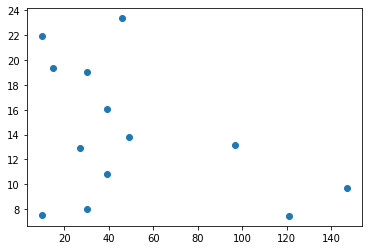

In [59]:
x = size.Product
y = size.Price
plt.scatter(x, y)

In [36]:
df_2.describe()

,Price,Review,Comments,Size Pe. [%],Size Corr. [%],Size Gran. [%],XS,S,M,L,XL,total_size,XS[%],S[%],M[%],L[%],XL[%]
count,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,707.000000,707.000000,707.000000,707.000000,707.000000
mean,12.628331,4.855680,4657.614306,4.394109,91.750351,3.855540,894.200561,1544.126227,1288.124825,824.835905,227.479663,4778.767181,17.188333,32.156692,27.569441,18.443876,4.641658
std,6.018523,0.132709,4131.947283,3.574303,4.608182,4.151641,1348.284664,1580.987748,1213.251491,894.986504,544.894910,4643.521478,13.446940,9.396025,5.181878,7.452583,6.728747
min,4.000000,4.100000,9.000000,0.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,4.800000,589.000000,2.000000,90.000000,1.000000,0.000000,171.000000,151.000000,94.000000,0.000000,547.000000,0.000000,26.495002,24.455167,12.834298,0.000000
50%,12.000000,4.900000,3331.000000,3.000000,93.000000,2.000000,247.000000,1041.000000,888.000000,536.000000,0.000000,3126.000000,18.226002,31.007067,27.840909,17.671233,0.000000
75%,16.000000,5.000000,9999.000000,5.000000,95.000000,6.000000,1482.000000,2777.000000,2399.000000,1357.000000,244.000000,9810.000000,26.576035,36.199353,30.957377,23.504880,8.993401
max,45.000000,5.000000,9999.000000,35.000000,100.000000,24.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,49995.000000,100.000000,72.513812,46.031746,45.569277,28.571429


In [39]:
df_2.fillna(0, inplace=True)

In [40]:
df_2.isna().sum()

Product           0
Price             0
Review            0
Comments          0
Category          0
Size Pe. [%]      0
Size Corr. [%]    0
Size Gran. [%]    0
XS                0
S                 0
M                 0
L                 0
XL                0
total_size        0
XS[%]             0
S[%]              0
M[%]              0
L[%]              0
XL[%]             0
dtype: int64

In [48]:
size.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  26 non-null     object 
 1   Product   26 non-null     int64  
 2   XS[%]     26 non-null     float64
 3   S[%]      26 non-null     float64
 4   M[%]      26 non-null     float64
 5   L[%]      26 non-null     float64
 6   XL[%]     26 non-null     float64
 7   Price     26 non-null     float64
 8   Comments  26 non-null     float64
 9   Review    26 non-null     float64
dtypes: float64(8), int64(1), object(1)
memory usage: 2.2+ KB


In [122]:
df_2[(df_2.Review == 5)&(df_2.total_size > 9999)].sort_values('Price', ascending=True).index.values

array([583, 184, 709, 465, 198,  23, 178, 354, 562, 692, 390, 451, 226,
       155, 373, 693, 163, 467, 329,  43, 683, 212], dtype=int64)

In [136]:
data.loc[371, 'Image']

'//img.ltwebstatic.com/images3_pi/2020/04/28/1588045286bd97865bff097c836940b044275b5271_thumbnail_900x.webp'

In [ ]:
data